<h3> CS3920/CS5920 Machine Learning Coursework</h3>

<h4> Assignment 2</h4>
    
This Assignment contains implemention of the following :<br>
  - Diabetes dataset from scikit learn exploration<br>
  - Original diabetes dataset preprocessing and plotting<br>
  - Inductive conformal predictor<br>
   

<h5> TASK 1: Load the scikit-learn version of the diabetes dataset using the load_diabetes function.

In [1]:
#Import dataset from scikit learn
import numpy as np
np.set_printoptions(suppress=True)
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
print("The features in diabetes dataset are:" ,diabetes['feature_names'])

The features in diabetes dataset are: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


<h5> TASK 2: Split the dataset into the training and test sets.

In [2]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes['data'], diabetes['target'],random_state =1403)

<h5> TASK 3 : The training and test R2 for the Lasso model using the default parameters. Number of features and features used

In [3]:
#Running Lasso on the diabetes dataset
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train,y_train)
print("The default train score is",lasso.score(X_train,y_train))
print("The default test score is" , lasso.score(X_test,y_test))

The default train score is 0.38057774122082466
The default test score is 0.30695764399889636


In [4]:
#Features used by lasso for cumputation
print("The number of features used:" ,np.sum(lasso.coef_ !=0))
feature_index = np.where(lasso.coef_!=0)
print("The selected features are:",", ".join([diabetes['feature_names'][x] for x in feature_index[0]]))

The number of features used: 2
The selected features are: bmi, s5


<h5> TASK 4,5: Load the original diabetes dataset from the web page and split the data into train and test samples

In [5]:
#import original data
X = np.delete(np.genfromtxt("E:\RHUL\Machine Learning\diabetes.data",delimiter ='\t',usecols = np.arange(10)),(0),axis =0)
Y = np.delete(np.genfromtxt("E:\RHUL\Machine Learning\diabetes.data",usecols = 10, delimiter = '\t', dtype = int),(0),axis=0)
X_train_dia, X_test_dia, y_train_dia, y_test_dia = train_test_split(X,Y,random_state=1403)

<h5>TASK 6 : Lasso model on original dataset

In [6]:
#Run lasso on the original data
lasso_dia = Lasso().fit(X_train_dia,y_train_dia)
print("The default train score is",lasso_dia.score(X_train_dia,y_train_dia))
print("The default test score is" , lasso_dia.score(X_test_dia,y_test_dia))

The default train score is 0.5155049384574509
The default test score is 0.4611292784728689


In [7]:
#Coefficients
print("The number of features used:" , np.sum(lasso_dia.coef_ !=0))
feature_index = np.where(lasso_dia.coef_!=0)
print("The selected features are : ",", ".join([diabetes['feature_names'][x] for x in feature_index[0]]))

The number of features used: 10
The selected features are :  age, sex, bmi, bp, s1, s2, s3, s4, s5, s6


<h6>Observation</h6>
The dataset from sklearn is normalized to 0-1 levels and therefore, lasso results in majority coefficients becoming 0.
The original dataset is not normalized and therefore we see the impact of all the features on the final result  

<h5>TASK 7,8: Preprocess the training and test sets using StandardScaler and repeat Lasso , note observations

In [8]:
#Standard Scaler from Scikit learn for scaling the data using fit and transform
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fitting StandardScaler
scaler.fit(X_train_dia)

#transform data on StandardScaler
X_train_dia_scaled = scaler.transform(X_train_dia)
X_test_dia_scaled = scaler.transform(X_test_dia)
lasso_norm = Lasso().fit(X_train_dia_scaled,y_train_dia)

print("Training score of scaled data",lasso_norm.score(X_train_dia_scaled, y_train_dia))
print("Testing score of scaled data",lasso_norm.score(X_test_dia_scaled, y_test_dia))
feature_index1 = np.where(lasso_norm.coef_!=0)
print("The selected labels are : ",", ".join([diabetes['feature_names'][x] for x in feature_index1[0]]))

Training score of scaled data 0.5197167357424546
Testing score of scaled data 0.4719151389527314
The selected labels are :  sex, bmi, bp, s1, s2, s3, s4, s5


In [9]:
#Mean of the scaled original data
X_train_dia_scaled.mean(axis=0)

array([-0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.])

In [10]:
#Mean of the sklearn dataset
X_train.mean(axis=0)

array([ 0.00087257, -0.00144447, -0.00163421, -0.00043523, -0.00074588,
       -0.00047613, -0.00048363, -0.00039826, -0.0008797 , -0.00217892])

<h5>Observation</h5>
The Standard scalar brings down the data to mean = 0 and unit variance, This means the impact of the features are preserved because all the data is centered around 0.
where as the sklearn dataset is scaled in such a way that the data shows 2 features have much more impact than the rest of the features
Therefore we get better scores in scaled and original data because feautre impacts are conserved and the model trains well

When all the features in a data set are important, Lasso tends to omit features and therefore impact of a few significant features on the label
might get removed.

<h5>TASK 9 : Plot R2 and number of features, and make it pretty

Text(0.5, 1.0, 'R2 vs Number of features')

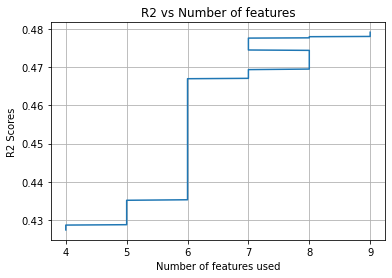

In [11]:
import matplotlib.pyplot as plt
lasso_score = []
total_coef = []
a = 0.1
while a<=5:
    lasso_alpha = Lasso(alpha=a,max_iter=1000).fit(X_train_dia_scaled,y_train_dia)
    lasso_score.append(lasso_alpha.score(X_test_dia_scaled,y_test_dia))
    total_coef.append(np.sum(lasso_alpha.coef_ !=0))    
    #print(total_coef)
    a = a + 0.01
plt.plot(total_coef,lasso_score)
plt.grid()
plt.xlabel("Number of features used")
plt.ylabel("R2 Scores")
plt.title("R2 vs Number of features")

<h5> TASK 10 : Choose the regularization parameter for the Lasso using cross-validation
on the training set.

In [12]:
from sklearn.model_selection import cross_val_score
best_score = np.NINF
b = 0.01
#Cross validation
while b<=5:
    lasso_val = Lasso(alpha=b,max_iter=1000).fit(X_train_dia_scaled,y_train_dia)   
    scores = cross_val_score(lasso_val,X_train_dia_scaled,y_train_dia,cv=5)  
    score = np.mean(scores)    
    b= b + 0.01  
    if score > best_score:        
        alpha_optimum = b
        best_score = score
print("The alpha for which we get the best scores: ", alpha_optimum)
#Apply optimum alpha on Lasso
lasso_optimum = Lasso(alpha=alpha_optimum,max_iter=1000).fit(X_train_dia_scaled,y_train_dia)
print("The optimum test score is",lasso_optimum.score(X_test_dia_scaled, y_test_dia))
print("The optimum train score is",lasso_optimum.score(X_train_dia_scaled, y_train_dia))
print("The selected features are : ",", ".join([diabetes['feature_names'][x] for x in np.where(lasso_optimum.coef_!=0)[0]]))

The alpha for which we get the best scores:  1.0000000000000007
The optimum test score is 0.4719151389527314
The optimum train score is 0.5197167357424546
The selected features are :  sex, bmi, bp, s1, s2, s3, s4, s5


<h5>TASK 11 : Inductive Conformal Prediction on original data with Lasso prediction model

In [13]:
#Create caliberation set and train proper
X_train_pr, X_valid, y_train_pr, y_valid = train_test_split(X_train_dia,
y_train_dia, random_state=1403,test_size=99)
print("The number of elements in caliberation set",X_valid.shape)

The number of elements in caliberation set (99, 10)


In [14]:
#Pre-processing the data on train proper and transforming training,caliberation and test data
scaler = StandardScaler()
scaler.fit(X_train_pr)
X_train_pr_scaled = scaler.transform(X_train_pr)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test_dia)
print("The number of elements in test set", X_test_scaled.shape)

The number of elements in test set (111, 10)


<h6>Lasso Training</h6>

In [15]:
c = 0.01
best_score_conformal = np.NINF

#Cross-validation for optimum value of alpha
while c<=5:
    lasso_model_check = Lasso(alpha=c,max_iter=1000).fit(X_train_pr_scaled,y_train_pr)   
    scores_conformal = cross_val_score(lasso_model_check,X_train_pr_scaled,y_train_pr,cv=5)   
    score_conformal = np.mean(scores_conformal)      
    c= c + 0.01  
    if score_conformal > best_score_conformal:        
        alpha_optimum_conformal = c
        best_score_conformal = score_conformal
lasso_model = Lasso(alpha = alpha_optimum_conformal).fit(X_train_pr_scaled,y_train_pr)
print("The optimum alpha calculated from cros-validation", alpha_optimum_conformal)
print("The score on this alpha",best_score_conformal)

The optimum alpha calculated from cros-validation 1.350000000000001
The score on this alpha 0.4796126246332718


<h6> Inductive conformal implementation

In [16]:
#Import math for ceil function
import math
y_c1 = [[]]
y_c2 = [[]]
count_c1 = 0
count_c2 = 0
amplitude_k5 = []
amplitude_k20 = []

#prediction of y-hat on caliberation set
y_hat_calib_list = lasso_model.predict(X_valid_scaled)
# alpha =| y_hat - y |
alpha_values = abs(y_hat_calib_list-y_valid)
alpha_values.sort()

#k = ceil((1-E)*(m+1))
k1 = math.ceil((1-0.05)*(len(alpha_values)+1))
k2 = math.ceil((1-0.20)*(len(alpha_values)+1))

#c = alpha(k)
c1 = alpha_values[k1]
c2 = alpha_values[k2]

#predity y_hat on test set
y_hat_test_list = lasso_model.predict(X_test_scaled)

#Calculation of prediction intervals 
for test_sample in range(len(y_hat_test_list)):
    y_min_c1 = y_hat_test_list[test_sample] - c1 
    y_min_c2 = y_hat_test_list[test_sample] - c2
    y_max_c1 = y_hat_test_list[test_sample] + c1 
    y_max_c2 = y_hat_test_list[test_sample] + c2
    
    y_c1.append([y_min_c1,y_max_c1])
    y_c2.append([y_min_c2,y_max_c2])
    
    amplitude_k5.append(abs(y_max_c1-y_min_c1))
    amplitude_k20.append(abs(y_max_c2-y_min_c2))
    
    if y_min_c1 <= y_test[test_sample] <=y_max_c1:
        count_c1 = count_c1 +1
    if y_min_c2 <= y_test[test_sample] <=y_max_c2:
        count_c2 = count_c2 +1 
        
#Calculation of test error 
test_error_c1 = (len(y_test_dia) -count_c1) / len(y_test_dia)
test_error_c2 = (len(y_test_dia) -count_c2) / len(y_test_dia)

print("The test error rate with E = 5% :", test_error_c1)
print("The test error rat accuracy with E = 20% :", test_error_c2)

print("\nThe length of interval for E=5%", amplitude_k5)
print("\nThe length of interval for E=20%", amplitude_k20)

The test error rate with E = 5% : 0.09009009009009009
The test error rat accuracy with E = 20% : 0.18018018018018017

The length of interval for E=5% [196.94952524970284, 196.94952524970284, 196.94952524970284, 196.94952524970287, 196.94952524970287, 196.94952524970284, 196.94952524970287, 196.94952524970287, 196.94952524970284, 196.94952524970287, 196.94952524970284, 196.94952524970287, 196.94952524970282, 196.94952524970284, 196.94952524970282, 196.94952524970284, 196.94952524970284, 196.94952524970284, 196.94952524970287, 196.94952524970284, 196.94952524970282, 196.94952524970284, 196.94952524970282, 196.94952524970284, 196.94952524970284, 196.94952524970287, 196.94952524970287, 196.94952524970284, 196.94952524970284, 196.94952524970282, 196.94952524970284, 196.94952524970284, 196.94952524970287, 196.94952524970284, 196.94952524970287, 196.94952524970284, 196.94952524970284, 196.94952524970284, 196.94952524970287, 196.94952524970284, 196.94952524970284, 196.94952524970287, 196.94952